In [1]:
#import necessary libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate 
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from IPython.display import Image, display




The data is cited from: 
AirNow. (2024). Data source: U.S. embassies and consulates. Retrieved December 01, 2024, from https://www.airnow.gov/international/us-embassies-and-consulates/#Bangladesh$Dhaka

**Some of the key features include:**

| **Column Name**         | **Description**                                                                 |
|--------------------------|-------------------------------------------------------------------------------|
| DateTime                | Timestamp in hourly intervals (YYYY-MM-DD HH:MM:SS). Serves as the index.      |
| Site                    | Location where the measurements were recorded (e.g., Dhaka).                  |
| Parameter               | Air quality parameter measured (PM2.5 - Principal).                           |
| Year                    | Year of the measurement (e.g., 2017, 2023).                                   |
| Month                   | Month of the measurement (1–12).                                              |
| Day                     | Day of the month (1–31).                                                      |
| Hour                    | Hour of the day (0–23, in 24-hour format).                                    |
| NowCast Conc.           | Calculated NowCast concentration of PM2.5 in micrograms per cubic meter (μg/m³).|
| AQI                     | Air Quality Index value corresponding to PM2.5 concentration.                 |
| AQI Category            | AQI classification based on thresholds: "Good," "Moderate," "Unhealthy," etc. |
| Raw Conc.               | Unadjusted raw concentration of PM2.5 (μg/m³).                                |
| Conc. Unit              | Unit of concentration measurement (UG/M3: Micrograms per cubic meter).        |
| Duration                | Duration of measurement (fixed at 1 Hour).                                    |
| QC Name                 | Quality Control classification of the data point (e.g., "Valid").             |
| AQI_7Day_RollingAvg     | 7-day rolling average of AQI, calculated for trend smoothing (168 hours).     |


In [3]:
#cconstants for filepaths and placeholder values. Please alter as needed
FOLDER_PATH = "./datasets"  # Relative path to the datasets folder
IMAGE_FILE_PATH = "./images/AQI_sheet.png"  # Relative path to the images folder
PLACEHOLDER_VALUES = [-999]


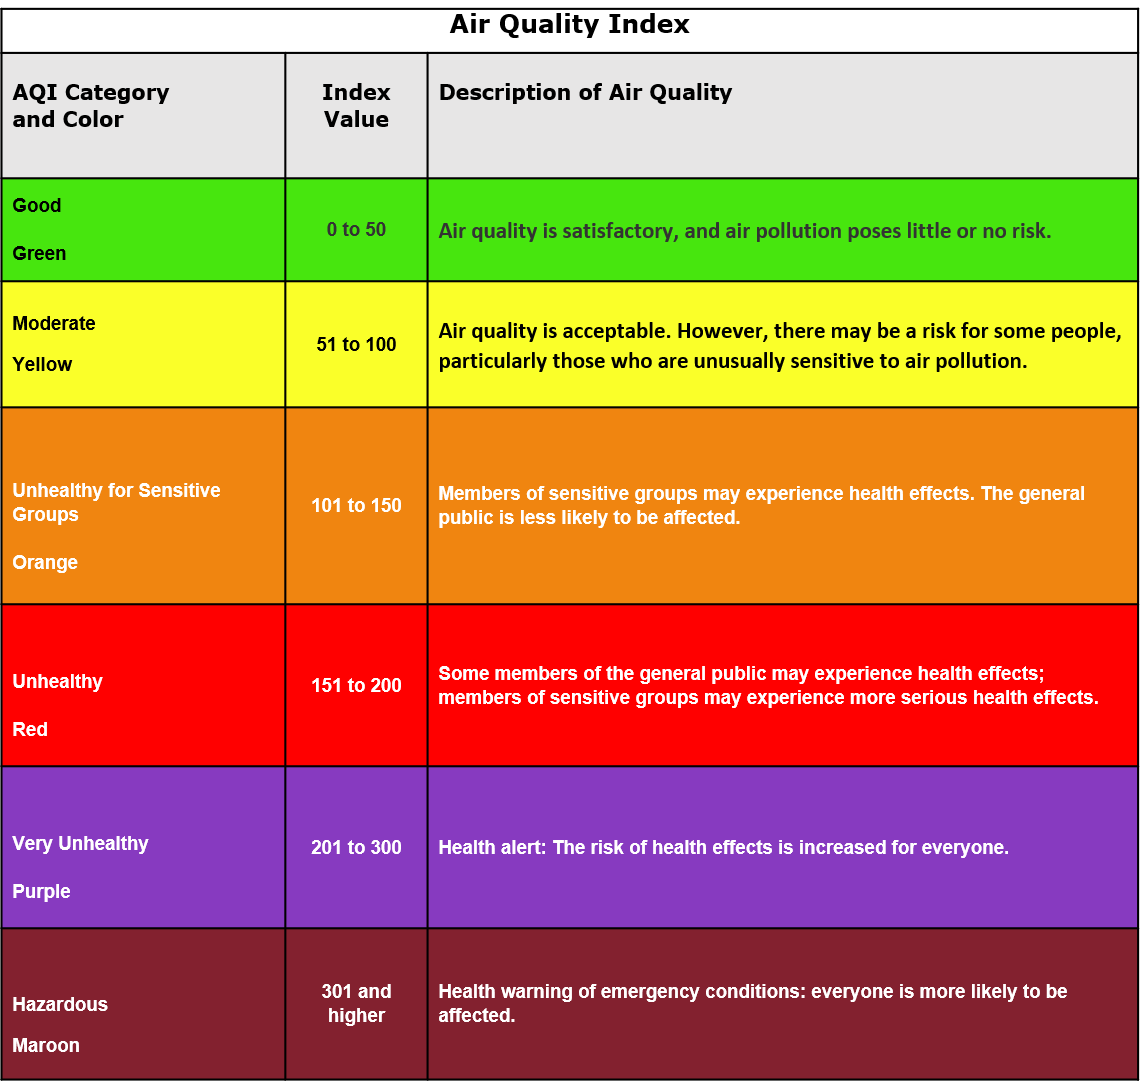

In [2]:
# Display the image
display(Image(filename=IMAGE_FILE_PATH))



In [4]:
#The following is a function to load and merge the air quality datasets based on the year range. 
#Arguments: folder path (str), prefix (str) : 'Dhaka_PM2.5_" , years (range) : of the years we want. 

def load_air_quality_data(folder_path = DATASET_FOLDER_PATH, prefix="Dhaka_PM2.5_", years=range(2017, 2024)):
  
    if not os.path.exists(folder_path):
        raise FileNotFoundError(f"The folder path does not exist: {folder_path}")

    files = [
        os.path.join(folder_path, file)
        for file in os.listdir(folder_path)
        if file.startswith(prefix) and any(str(year) in file for year in years)
    ]

    if not files:
        raise ValueError("No air quality files found for the specified criteria.")

    return pd.concat([pd.read_csv(file) for file in files], ignore_index=True)

In [5]:
#load the merged data set of all the different years

merged = load_air_quality_data(DATASET_FOLDER_PATH)

merged

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,Dhaka,PM2.5 - Principal,2017-01-01 01:00 AM,2017,1,1,1,287.8,338,Hazardous,287.0,UG/M3,1 Hr,Valid
1,Dhaka,PM2.5 - Principal,2017-01-01 02:00 AM,2017,1,1,2,297.4,347,Hazardous,307.0,UG/M3,1 Hr,Valid
2,Dhaka,PM2.5 - Principal,2017-01-01 03:00 AM,2017,1,1,3,300.2,350,Hazardous,303.0,UG/M3,1 Hr,Valid
3,Dhaka,PM2.5 - Principal,2017-01-01 04:00 AM,2017,1,1,4,306.1,356,Hazardous,312.0,UG/M3,1 Hr,Valid
4,Dhaka,PM2.5 - Principal,2017-01-01 05:00 AM,2017,1,1,5,313.8,364,Hazardous,322.0,UG/M3,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58166,Dhaka,PM2.5 - Principal,2023-12-31 08:00 PM,2023,12,31,20,191.7,242,Very Unhealthy,199.0,UG/M3,1 Hr,Valid
58167,Dhaka,PM2.5 - Principal,2023-12-31 09:00 PM,2023,12,31,21,194.7,245,Very Unhealthy,205.0,UG/M3,1 Hr,Valid
58168,Dhaka,PM2.5 - Principal,2023-12-31 10:00 PM,2023,12,31,22,192.5,243,Very Unhealthy,185.0,UG/M3,1 Hr,Valid
58169,Dhaka,PM2.5 - Principal,2023-12-31 11:00 PM,2023,12,31,23,189.7,240,Very Unhealthy,181.0,UG/M3,1 Hr,Valid


In [6]:
# Inspecting the dataset structure alongside summary statistics
print("Dataset Info:")
print(merged.info())

print("\nDataset Preview:")
print(merged.head())

print("\nSummary Statistics:")
print(merged.describe())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58171 entries, 0 to 58170
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Site           58171 non-null  object 
 1   Parameter      58171 non-null  object 
 2   Date (LT)      58171 non-null  object 
 3   Year           58171 non-null  int64  
 4   Month          58171 non-null  int64  
 5   Day            58171 non-null  int64  
 6   Hour           58171 non-null  int64  
 7   NowCast Conc.  58171 non-null  float64
 8   AQI            58171 non-null  int64  
 9   AQI Category   57744 non-null  object 
 10  Raw Conc.      58171 non-null  float64
 11  Conc. Unit     58171 non-null  object 
 12  Duration       58171 non-null  object 
 13  QC Name        58171 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 6.2+ MB
None

Dataset Preview:
    Site          Parameter            Date (LT)  Year  Month  Day  Hour  \
0  Dhaka  PM

In [7]:
# Remove and then Identify duplicate timestamps in 'Date (LT)' column

merged = merged.drop_duplicates(subset='Date (LT)')
duplicates = merged['Date (LT)'][merged['Date (LT)'].duplicated()]
print("Duplicate Timestamps:")
print(duplicates)




Duplicate Timestamps:
Series([], Name: Date (LT), dtype: object)


In [8]:
# Drop rows where QC Name is 'Invalid' or 'Suspect'
merged = merged[~merged['QC Name'].isin(['Invalid', 'Suspect'])]

# Validate remaining rows
print(merged['QC Name'].value_counts())



Valid      57305
Missing      664
Name: QC Name, dtype: int64


In [9]:
# Convert 'Date (LT)' column to datetime format if not already done
merged['Date (LT)'] = pd.to_datetime(merged['Date (LT)'], format='%Y-%m-%d %I:%M %p')

# Generate a full datetime range based on the min and max dates in the dataset
full_date_range = pd.date_range(start=merged['Date (LT)'].min(), end=merged['Date (LT)'].max(), freq='H')

# Reindex the dataset to include the full date-time range
merged = merged.set_index('Date (LT)').reindex(full_date_range)

# Set the new datetime index
merged.index.name = 'DateTime'

# Validate the resulting dataset
print(merged.head())
print("\nDataset summary:")
print(merged.info())


                      Site          Parameter    Year  Month  Day  Hour  \
DateTime                                                                  
2017-01-01 01:00:00  Dhaka  PM2.5 - Principal  2017.0    1.0  1.0   1.0   
2017-01-01 02:00:00  Dhaka  PM2.5 - Principal  2017.0    1.0  1.0   2.0   
2017-01-01 03:00:00  Dhaka  PM2.5 - Principal  2017.0    1.0  1.0   3.0   
2017-01-01 04:00:00  Dhaka  PM2.5 - Principal  2017.0    1.0  1.0   4.0   
2017-01-01 05:00:00  Dhaka  PM2.5 - Principal  2017.0    1.0  1.0   5.0   

                     NowCast Conc.    AQI AQI Category  Raw Conc. Conc. Unit  \
DateTime                                                                       
2017-01-01 01:00:00          287.8  338.0    Hazardous      287.0      UG/M3   
2017-01-01 02:00:00          297.4  347.0    Hazardous      307.0      UG/M3   
2017-01-01 03:00:00          300.2  350.0    Hazardous      303.0      UG/M3   
2017-01-01 04:00:00          306.1  356.0    Hazardous      312.0      UG/

In [10]:
# Check for unique values in categorical columns
categorical_columns = ['Site', 'Parameter', 'Conc. Unit', 'Duration', 'QC Name', 'AQI Category']
for col in categorical_columns:
    print(f"\nUnique values in '{col}':")
    print(merged[col].unique())

# Check for missing values
print("\nMissing values in each column:")
print(merged.isna().sum())

# Check for invalid placeholder values (e.g., -999)
placeholder_check = merged.isin([-999]).sum()
print("\nInvalid placeholder values (-999) in each column:")
print(placeholder_check)



Unique values in 'Site':
['Dhaka' nan]

Unique values in 'Parameter':
['PM2.5 - Principal' nan]

Unique values in 'Conc. Unit':
['UG/M3' nan]

Unique values in 'Duration':
['1 Hr' nan]

Unique values in 'QC Name':
['Valid' 'Missing' nan]

Unique values in 'AQI Category':
['Hazardous' 'Very Unhealthy' 'Unhealthy' nan
 'Unhealthy for Sensitive Groups' 'Moderate' 'Good']

Missing values in each column:
Site             3375
Parameter        3375
Year             3375
Month            3375
Day              3375
Hour             3375
NowCast Conc.    3375
AQI              3375
AQI Category     3663
Raw Conc.        3375
Conc. Unit       3375
Duration         3375
QC Name          3375
dtype: int64

Invalid placeholder values (-999) in each column:
Site               0
Parameter          0
Year               0
Month              0
Day                0
Hour               0
NowCast Conc.    286
AQI              288
AQI Category       0
Raw Conc.        664
Conc. Unit         0
Duration       

In [11]:
# Replace -999 with NaN for relevant columns
columns_to_clean = ['NowCast Conc.', 'AQI', 'Raw Conc.']
for col in columns_to_clean:
    merged[col] = merged[col].apply(lambda x: pd.NA if x == -999 else x)


In [12]:
# Fill uniform columns using forward and backward fill
uniform_columns = ['Site', 'Parameter', 'Conc. Unit', 'Duration', 'QC Name']
for col in uniform_columns:
    merged[col] = merged[col].fillna(method='ffill').fillna(method='bfill')


# Recalculate date-related columns based on the new index
merged['Year'] = merged.index.year
merged['Month'] = merged.index.month
merged['Day'] = merged.index.day
merged['Hour'] = merged.index.hour


In [13]:
#shows the different AQI categories and their frequency

merged['AQI Category'].value_counts()

Unhealthy                         21628
Moderate                          12832
Unhealthy for Sensitive Groups    10343
Very Unhealthy                     8885
Hazardous                          2616
Good                               1377
Name: AQI Category, dtype: int64

In [14]:
# Group-based filling for numerical columns. This is because air quality often follows hourly and seasonal patterns and thus this method hopes to respect the patterns
for col in ['NowCast Conc.', 'AQI', 'Raw Conc.']:
    merged[col] = merged.groupby(['Month', 'Hour'])[col].transform(
        lambda x: x.fillna(x.mean())
    )

# Infer AQI Category based on AQI ranges
aqi_categories = {
    (0, 50): 'Good',
    (51, 100): 'Moderate',
    (101, 150): 'Unhealthy for Sensitive Groups',
    (151, 200): 'Unhealthy',
    (201, 300): 'Very Unhealthy',
    (301, float('inf')): 'Hazardous',
}

def assign_aqi_category(aqi):
    if pd.isna(aqi):
        return pd.NA
    for (low, high), category in aqi_categories.items():
        if low <= aqi <= high:
            return category
    return pd.NA

merged['AQI Category'] = merged['AQI'].apply(assign_aqi_category)

# Group-based filling for AQI Category
merged['AQI Category'] = merged.groupby(['Month', 'Hour'])['AQI Category'].transform(
    lambda x: x.fillna(method='ffill').fillna(method='bfill')
)


In [15]:
# Add a 7-day rolling average for AQI (168 hours for hourly data)
merged['AQI_7Day_RollingAvg'] = merged['AQI'].rolling(window=168, min_periods=1).mean()
merged


,Site,Parameter,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name,AQI_7Day_RollingAvg
DateTime,,,,,,,,,,,,,,
2017-01-01 01:00:00,Dhaka,PM2.5 - Principal,2017,1,1,1,287.8,338.0,Hazardous,287.0,UG/M3,1 Hr,Valid,338.000000
2017-01-01 02:00:00,Dhaka,PM2.5 - Principal,2017,1,1,2,297.4,347.0,Hazardous,307.0,UG/M3,1 Hr,Valid,342.500000
2017-01-01 03:00:00,Dhaka,PM2.5 - Principal,2017,1,1,3,300.2,350.0,Hazardous,303.0,UG/M3,1 Hr,Valid,345.000000
2017-01-01 04:00:00,Dhaka,PM2.5 - Principal,2017,1,1,4,306.1,356.0,Hazardous,312.0,UG/M3,1 Hr,Valid,347.750000
2017-01-01 05:00:00,Dhaka,PM2.5 - Principal,2017,1,1,5,313.8,364.0,Hazardous,322.0,UG/M3,1 Hr,Valid,351.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 20:00:00,Dhaka,PM2.5 - Principal,2023,12,31,20,191.7,242.0,Very Unhealthy,199.0,UG/M3,1 Hr,Valid,248.035714
2023-12-31 21:00:00,Dhaka,PM2.5 - Principal,2023,12,31,21,194.7,245.0,Very Unhealthy,205.0,UG/M3,1 Hr,Valid,247.726190
2023-12-31 22:00:00,Dhaka,PM2.5 - Principal,2023,12,31,22,192.5,243.0,Very Unhealthy,185.0,UG/M3,1 Hr,Valid,247.345238


In [16]:
merged.isnull().sum()

Site                   0
Parameter              0
Year                   0
Month                  0
Day                    0
Hour                   0
NowCast Conc.          0
AQI                    0
AQI Category           0
Raw Conc.              0
Conc. Unit             0
Duration               0
QC Name                0
AQI_7Day_RollingAvg    0
dtype: int64

In [17]:
#visualize the first 20 

merged.head(20)

,Site,Parameter,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name,AQI_7Day_RollingAvg
DateTime,,,,,,,,,,,,,,
2017-01-01 01:00:00,Dhaka,PM2.5 - Principal,2017,1,1,1,287.8,338.0,Hazardous,287.0,UG/M3,1 Hr,Valid,338.000000
2017-01-01 02:00:00,Dhaka,PM2.5 - Principal,2017,1,1,2,297.4,347.0,Hazardous,307.0,UG/M3,1 Hr,Valid,342.500000
2017-01-01 03:00:00,Dhaka,PM2.5 - Principal,2017,1,1,3,300.2,350.0,Hazardous,303.0,UG/M3,1 Hr,Valid,345.000000
2017-01-01 04:00:00,Dhaka,PM2.5 - Principal,2017,1,1,4,306.1,356.0,Hazardous,312.0,UG/M3,1 Hr,Valid,347.750000
2017-01-01 05:00:00,Dhaka,PM2.5 - Principal,2017,1,1,5,313.8,364.0,Hazardous,322.0,UG/M3,1 Hr,Valid,351.000000
2017-01-01 06:00:00,Dhaka,PM2.5 - Principal,2017,1,1,6,290.3,340.0,Hazardous,248.0,UG/M3,1 Hr,Valid,349.166667
2017-01-01 07:00:00,Dhaka,PM2.5 - Principal,2017,1,1,7,269.3,320.0,Hazardous,224.0,UG/M3,1 Hr,Valid,345.000000
2017-01-01 08:00:00,Dhaka,PM2.5 - Principal,2017,1,1,8,262.5,313.0,Hazardous,247.0,UG/M3,1 Hr,Valid,341.000000
2017-01-01 09:00:00,Dhaka,PM2.5 - Principal,2017,1,1,9,264.0,314.0,Hazardous,268.0,UG/M3,1 Hr,Valid,338.000000


In [18]:
#save the cleaned data
CLEANED_FILE_PATH = "./datasets/cleaned_airqualityDhaka_dataset.csv"
merged.to_csv(CLEANED_FILE_PATH, index=True)
print(f"Dataset saved successfully to {CLEANED_FILE_PATH}")


Dataset saved successfully to C:\Users\Shafi Hussain\OneDrive\Desktop\DSCI 105\FINAL PROJECT DATASETS\cleaned_airqualityDhaka_dataset.csv



--- Correlation Matrix ---
╒════╤═════════════════════╤═════════════════╤══════════╤═════════════╤═══════════════════════╕
│    │ Variable            │   NowCast Conc. │      AQI │   Raw Conc. │   AQI_7Day_RollingAvg │
╞════╪═════════════════════╪═════════════════╪══════════╪═════════════╪═══════════════════════╡
│  0 │ NowCast Conc.       │        1        │ 0.973956 │    0.972839 │              0.757459 │
├────┼─────────────────────┼─────────────────┼──────────┼─────────────┼───────────────────────┤
│  1 │ AQI                 │        0.973956 │ 1        │    0.946549 │              0.768214 │
├────┼─────────────────────┼─────────────────┼──────────┼─────────────┼───────────────────────┤
│  2 │ Raw Conc.           │        0.972839 │ 0.946549 │    1        │              0.717195 │
├────┼─────────────────────┼─────────────────┼──────────┼─────────────┼───────────────────────┤
│  3 │ AQI_7Day_RollingAvg │        0.757459 │ 0.768214 │    0.717195 │              1        │
╘════╧══════

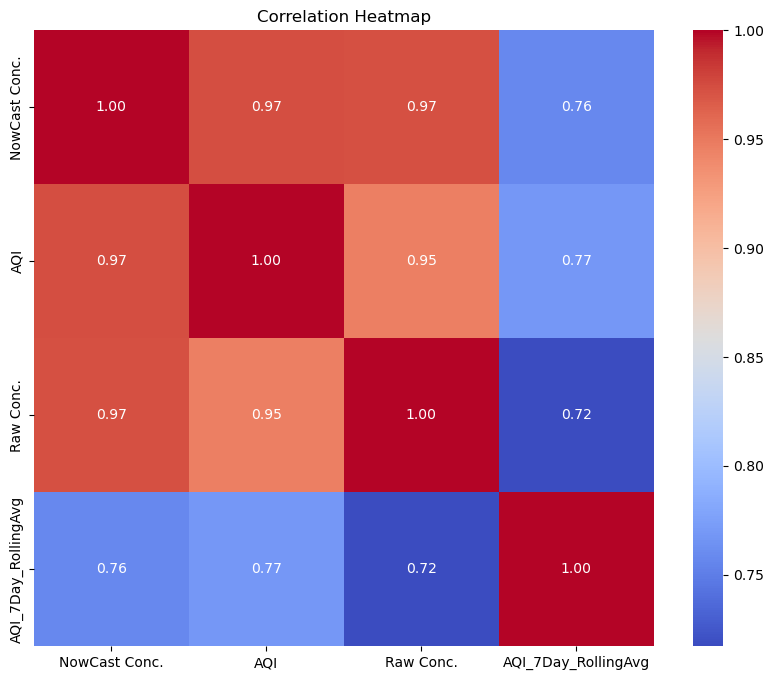

In [19]:
# 3. Correlation Analysis
# Compute correlation matrix
correlation_matrix = merged[['NowCast Conc.', 'AQI', 'Raw Conc.', 'AQI_7Day_RollingAvg']].corr()
# Convert the correlation matrix to a tabulated format
correlation_matrix_table = correlation_matrix.reset_index()  # Reset index to include variable names in the table

# Tabulate the correlation matrix
print("\n--- Correlation Matrix ---")
print(tabulate(correlation_matrix_table, headers=["Variable"] + list(correlation_matrix.columns), tablefmt="fancy_grid"))

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Heatmap")
plt.show()



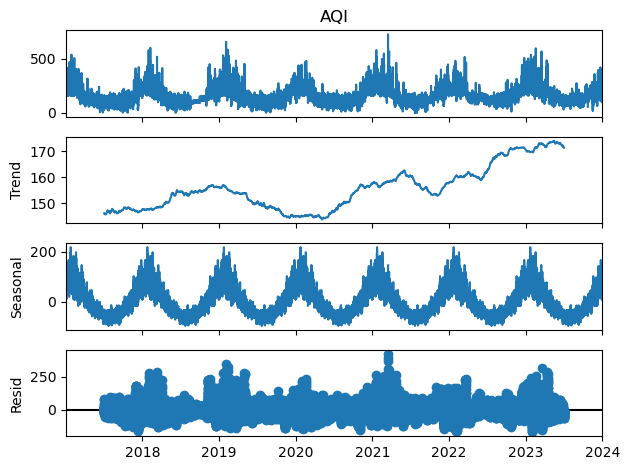

In [20]:
# Decompose AQI time series to check for seasonality and trend
#We can see that there is a clear yearly seasonality for the data.
result = seasonal_decompose(merged['AQI'], model='additive', period=24*365)

# Clear previous plots
#plt.close('all')

# Plot the decomposition
result.plot()
plt.show()



--- Frequency of AQI Categories ---
╒════════════════════════════════╤═════════╕
│ AQI Category                   │   Count │
╞════════════════════════════════╪═════════╡
│ Unhealthy                      │   21866 │
├────────────────────────────────┼─────────┤
│ Moderate                       │   13760 │
├────────────────────────────────┼─────────┤
│ Unhealthy for Sensitive Groups │   12580 │
├────────────────────────────────┼─────────┤
│ Very Unhealthy                 │    9143 │
├────────────────────────────────┼─────────┤
│ Hazardous                      │    2618 │
├────────────────────────────────┼─────────┤
│ Good                           │    1377 │
╘════════════════════════════════╧═════════╛


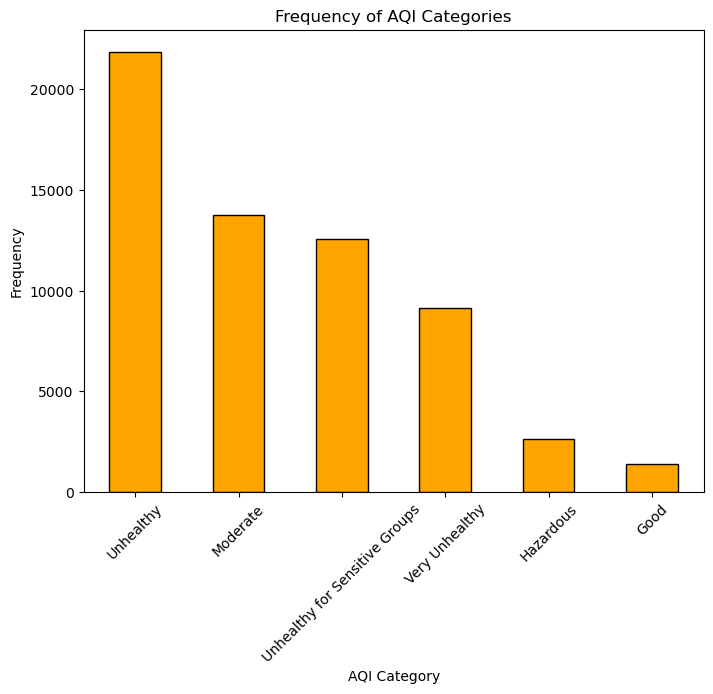

In [21]:
# Count AQI categories
aqi_category_counts = merged['AQI Category'].value_counts()


# Create a summary table
summary_table = [{"AQI Category": category, "Count": count} for category, count in aqi_category_counts.items()]

# Print as a table
print("\n--- Frequency of AQI Categories ---")
print(tabulate(summary_table, headers="keys", tablefmt="fancy_grid"))

# Plot bar chart
plt.figure(figsize=(8, 6))
aqi_category_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.xlabel('AQI Category')
plt.ylabel('Frequency')
plt.title('Frequency of AQI Categories')
plt.xticks(rotation=45)
plt.show()



--- Hourly AQI General Statistics ---
╒═════════════════════╤═════════╤═════════╕
│ Statistic           │   Value │ Hour    │
╞═════════════════════╪═════════╪═════════╡
│ Minimum Average AQI │  132    │ Hour 16 │
├─────────────────────┼─────────┼─────────┤
│ Maximum Average AQI │  171.81 │ Hour 0  │
├─────────────────────┼─────────┼─────────┤
│ Mean Average AQI    │  156.07 │ -       │
├─────────────────────┼─────────┼─────────┤
│ Standard Deviation  │   14.18 │ -       │
╘═════════════════════╧═════════╧═════════╛


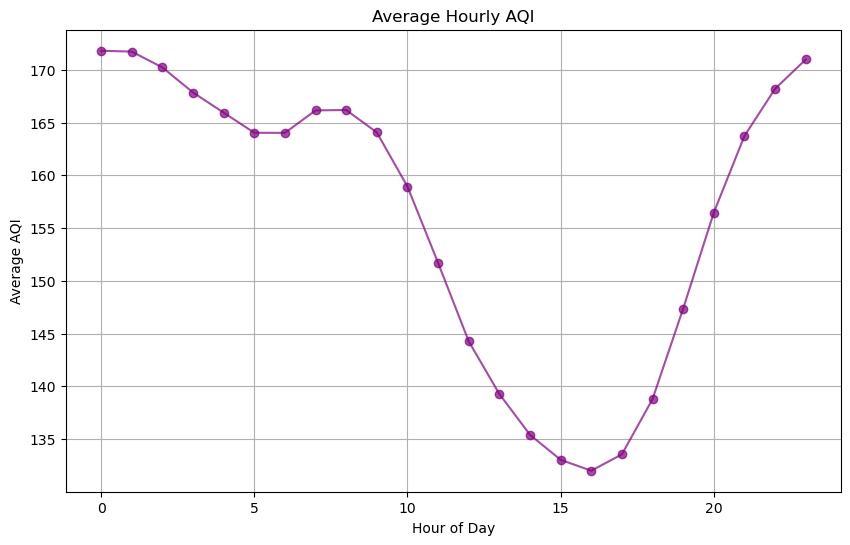

In [22]:
# Group by hour and calculate average AQI
hourly_avg_aqi = merged.groupby('Hour')['AQI'].mean()

# Calculate general statistics
stats = [
    ["Minimum Average AQI", f"{hourly_avg_aqi.min():.2f}", f"Hour {hourly_avg_aqi.idxmin()}"],
    ["Maximum Average AQI", f"{hourly_avg_aqi.max():.2f}", f"Hour {hourly_avg_aqi.idxmax()}"],
    ["Mean Average AQI", f"{hourly_avg_aqi.mean():.2f}", "-"],
    ["Standard Deviation", f"{hourly_avg_aqi.std():.2f}", "-"]
]

# Print the table
print("\n--- Hourly AQI General Statistics ---")
print(tabulate(stats, headers=["Statistic", "Value", "Hour"], tablefmt="fancy_grid"))


# Plot hourly averages
plt.figure(figsize=(10, 6))
hourly_avg_aqi.plot(kind='line', color='purple', marker='o', alpha=0.7)
plt.xlabel('Hour of Day')
plt.ylabel('Average AQI')
plt.title('Average Hourly AQI')
plt.grid()
plt.show()



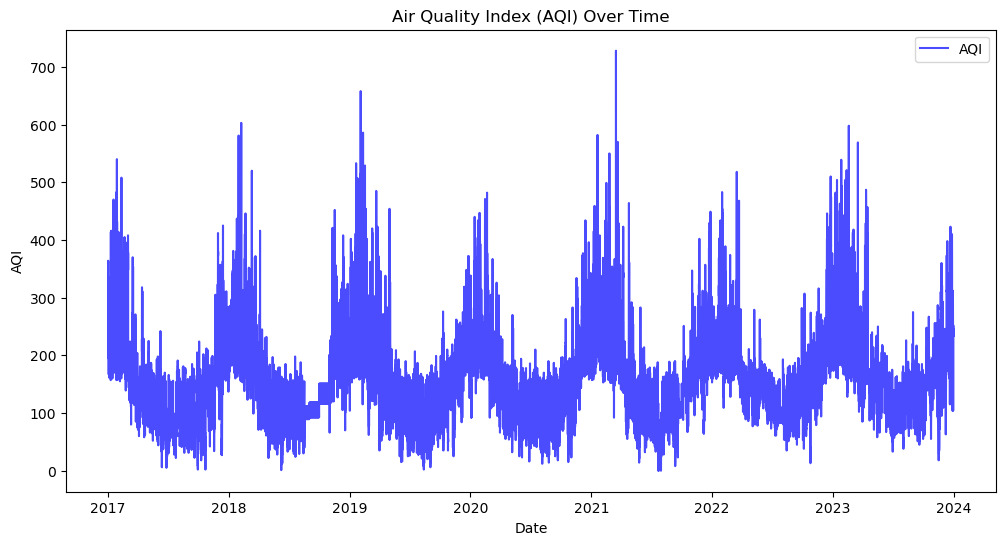

In [23]:
# Plot AQI over time
plt.figure(figsize=(12, 6))
plt.plot(merged.index, merged['AQI'], label='AQI', alpha=0.7, color='blue')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Air Quality Index (AQI) Over Time')
plt.legend()
plt.show()


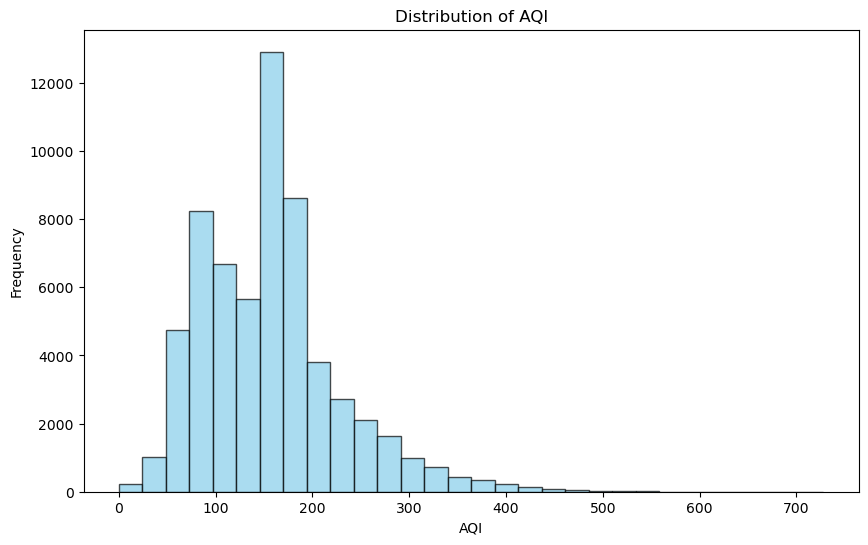

In [24]:
# Plot histogram of AQI
plt.figure(figsize=(10, 6))
plt.hist(merged['AQI'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.title('Distribution of AQI')
plt.show()


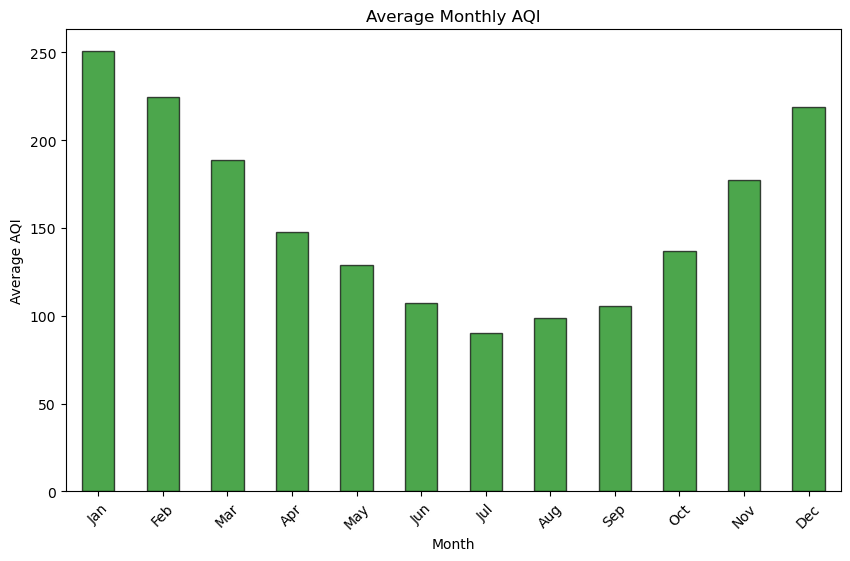

In [25]:
# Group by month and calculate average AQI
monthly_avg_aqi = merged.groupby('Month')['AQI'].mean()

# Plot bar chart
plt.figure(figsize=(10, 6))
monthly_avg_aqi.plot(kind='bar', color='green', edgecolor='black', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.title('Average Monthly AQI')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


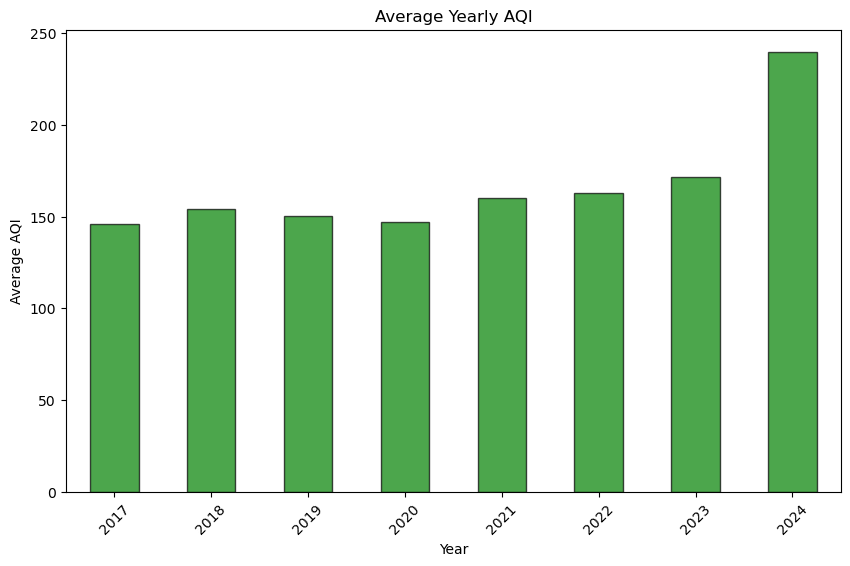

In [26]:
# Yearly average AQI
yearly_avg_aqi = merged.groupby('Year')['AQI'].mean()
plt.figure(figsize=(10, 6))
yearly_avg_aqi.plot(kind='bar', color='green', alpha=0.7, edgecolor='black')
plt.title('Average Yearly AQI')
plt.xlabel('Year')
plt.ylabel('Average AQI')
plt.xticks(rotation=45)
plt.show()


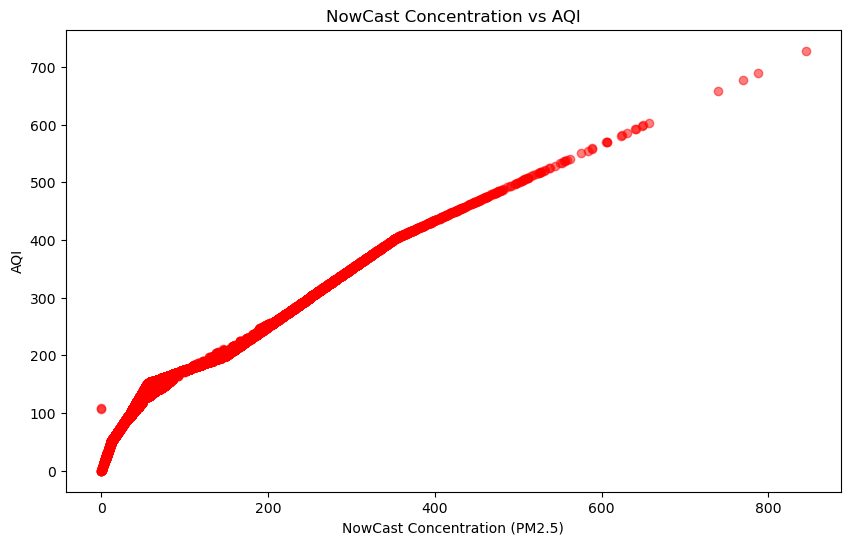

In [27]:
# Scatter plot of NowCast Concentration vs AQI
plt.figure(figsize=(10, 6))
plt.scatter(merged['NowCast Conc.'], merged['AQI'], alpha=0.5, color='red')
plt.xlabel('NowCast Concentration (PM2.5)')
plt.ylabel('AQI')
plt.title('NowCast Concentration vs AQI')
plt.show()


In [28]:
#the following code uses an iframe and shows multiple interactive tableau visualizations

from IPython.core.display import HTML



tableau_url = "https://public.tableau.com/views/TableauVisualizations_17343956476190/AverageAQIovertheyears?:showVizHome=no"

iframe_code = f"""
<iframe 
    src="{tableau_url}" 
    width="1000" 
    height="700" 
    style="border: none;">
</iframe>
"""

HTML(iframe_code)


From the above tableau visualizations we can see numerous trends within our data. 

We can see that the average AQI is increasing over the years with an upward trend, suggesting that the level of air pollution is gradually getting worse. This indicates a greater potential health concern isssue for the residents of Dhaka, Bangladesh. In 2017 the average AQI started of at 146.14 and increased steadily reaching 171.45 in 2023.  

With the Avg Now Cast there is a definite monthly trend. We can see that it is relatively very high on the first 3 months and then drops to almost half and less than half forr the months April - October, and then increases again for the months 11, 12. Bangladesh actually has 6 seasons being early Autumn (Sarat) , Late Autumn (Hemanta), Monsoon (Barsha), Spring (Boshonto), Winter (Sheet). The average Nowcast concentration is the highest at Winter at about 178.4 and then 141.1 during Spring. It stays relatively low for the other seasons.  

Based on our data spanning 2017 to 2023, we can see most of our recorded AQI levels were in the unhealthy range. Note that this does mean that the air quality is poor and can have negative health affects. The other 3 majority being moderate, very unhealthy, and unhealthy for sensitive groups furthermore suggesting the poor quality of air in bangladesh. The lowest frequency being good which suggests that air quality issues should definitely be addressed. This is further seen by the distribution of AQI where we can see majority of spanning from 50 - 200 , which is going from moderate air quality to unhealthy. 

Rather intuitive but Nowcast concentration is proportionally related to AQI, with AQI levels increasing when NowCast concentrations rise. Similarly both AQI and NowCast concentrations are greater during nighttime rather than daytime. 

Thus overall we can see a trend of worsening AQI levels which may lead to many health concerns as well as environmental issues. Thus it is crucial for us to address this issue as soon as possible before it gets worst. 











